In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7c2e579f-5bfc-41f3-a190-8a522257d4fb',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [3]:
type(data)

dict

In [4]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
    # If 'data' key doesn't exist, normalize the entire data object
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12238,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.988888e+07,1.988888e+07,False,NaN,1,NaN,NaN,None,2025-07-07T11:46:00.000Z,108763.625873,4.068853e+10,35.0593,-0.002360,0.634269,0.847275,3.353207,9.253504,36.517164,2.163187e+12,64.4287,2.284036e+12,None,2025-07-07T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 07:47:52.582805
1,1027,Ethereum,ETH,ethereum,10371,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207169e+08,1.207169e+08,True,NaN,2,NaN,NaN,None,2025-07-07T11:46:00.000Z,2564.260431,1.606747e+10,78.7404,0.031464,2.001415,4.056957,2.617279,31.251362,61.971488,3.095496e+11,9.2197,3.095496e+11,None,2025-07-07T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 07:47:52.582805
2,825,Tether USDt,USDT,tether,135428,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.585817e+11,1.608224e+11,True,NaN,3,NaN,NaN,None,2025-07-07T11:46:00.000Z,1.000032,5.784391e+10,58.0752,-0.012714,-0.025614,-0.006020,-0.061932,-0.005012,0.022298,1.585867e+11,4.7234,1.608276e+11,None,2025-07-07T11:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-07 07:47:52.582805
3,52,XRP,XRP,xrp,1640,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.906819e+10,9.998597e+10,False,NaN,4,NaN,NaN,None,2025-07-07T11:47:00.000Z,2.282691,2.506750e+09,44.8043,-0.449040,0.604117,4.633109,4.463580,3.480506,18.228727,1.348344e+11,4.0147,2.282691e+11,None,2025-07-07T11:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 07:47:52.582805
4,1839,BNB,BNB,bnb,2603,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408851e+08,1.408851e+08,False,NaN,5,NaN,NaN,None,2025-07-07T11:47:00.000Z,662.341062,1.516165e+09,28.6030,0.032298,0.986837,1.216238,2.123519,7.903584,17.841369,9.331400e+10,2.7784,9.331400e+10,None,2025-07-07T11:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 07:47:52.582805
5,5426,Solana,SOL,solana,944,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.355759e+08,6.047418e+08,True,NaN,6,5.252369e+08,8.049996e+10,None,2025-07-07T11:46:00.000Z,153.264095,3.460207e+09,134.4518,0.573903,3.780857,1.646588,1.018560,-0.635897,38.077517,8.208456e+10,2.4448,9.268520e+10,None,2025-07-07T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 07:47:52.582805
6,3408,USDC,USDC,usd-coin,29106,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.209261e+10,6.209261e+10,False,NaN,7,6.090122e+10,6.089501e+10,None,2025-07-07T11:46:00.000Z,0.999898,6.880414e+09,103.9611,-0.010548,-0.005564,0.004360,-0.008430,-0.002522,-0.013408,6.208628e+10,1.8486,6.208628e+10,None,2025-07-07T11:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-07 07:47:52.582805
7,1958,TRON,TRX,tron,1194,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.478067e+10,9.478069e+10,True,NaN,8,7.165966e+10,2.062003e+10,None,2025-07-07T11:46:00.000Z,0.287750,3.205406e+08,25.3133,0.157213,0.999623,3.759842,2.838963,14.682859,22.728284,2.727309e+10,0.8120,2.727310e+10,None,2025-07-07T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 07:47:52.582805
8,74,Dogecoin,DOGE,dogecoin,1247,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medi

In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '7c2e579f-5bfc-41f3-a190-8a522257d4fb',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    #Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df =  pd.concat([df,df_append])


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile('/Users/user/Downloads/Python Scripts/API.csv'):
        #df.to_csv('/Users/user/Downloads/Python Scripts/API.csv', header='column_names')
    #else:
       #df.to_csv('/Users/user/Downloads/Python Scripts/API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv('/Users/user/Downloads/Python Scripts/API.csv')

# If that didn't work try using the local host URL as shown in the video

In [7]:
import os 
from time import time
from time import sleep

def api_runner():
    pass

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12238,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.988888e+07,1.988888e+07,False,NaN,1,NaN,NaN,None,2025-07-07T11:46:00.000Z,108763.625873,4.068853e+10,35.0593,-0.002360,0.634269,0.847275,3.353207,9.253504,36.517164,2.163187e+12,64.4287,2.284036e+12,None,2025-07-07T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 07:47:52.582805
1,1027,Ethereum,ETH,ethereum,10371,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207169e+08,1.207169e+08,True,NaN,2,NaN,NaN,None,2025-07-07T11:46:00.000Z,2564.260431,1.606747e+10,78.7404,0.031464,2.001415,4.056957,2.617279,31.251362,61.971488,3.095496e+11,9.2197,3.095496e+11,None,2025-07-07T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 07:47:52.582805
2,825,Tether USDt,USDT,tether,135428,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.585817e+11,1.608224e+11,True,NaN,3,NaN,NaN,None,2025-07-07T11:46:00.000Z,1.000032,5.784391e+10,58.0752,-0.012714,-0.025614,-0.006020,-0.061932,-0.005012,0.022298,1.585867e+11,4.7234,1.608276e+11,None,2025-07-07T11:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-07 07:47:52.582805
3,52,XRP,XRP,xrp,1640,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.906819e+10,9.998597e+10,False,NaN,4,NaN,NaN,None,2025-07-07T11:47:00.000Z,2.282691,2.506750e+09,44.8043,-0.449040,0.604117,4.633109,4.463580,3.480506,18.228727,1.348344e+11,4.0147,2.282691e+11,None,2025-07-07T11:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 07:47:52.582805
4,1839,BNB,BNB,bnb,2603,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408851e+08,1.408851e+08,False,NaN,5,NaN,NaN,None,2025-07-07T11:47:00.000Z,662.341062,1.516165e+09,28.6030,0.032298,0.986837,1.216238,2.123519,7.903584,17.841369,9.331400e+10,2.7784,9.331400e+10,None,2025-07-07T11:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 07:47:52.582805
5,5426,Solana,SOL,solana,944,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.355759e+08,6.047418e+08,True,NaN,6,5.252369e+08,8.049996e+10,None,2025-07-07T11:46:00.000Z,153.264095,3.460207e+09,134.4518,0.573903,3.780857,1.646588,1.018560,-0.635897,38.077517,8.208456e+10,2.4448,9.268520e+10,None,2025-07-07T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 07:47:52.582805
6,3408,USDC,USDC,usd-coin,29106,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.209261e+10,6.209261e+10,False,NaN,7,6.090122e+10,6.089501e+10,None,2025-07-07T11:46:00.000Z,0.999898,6.880414e+09,103.9611,-0.010548,-0.005564,0.004360,-0.008430,-0.002522,-0.013408,6.208628e+10,1.8486,6.208628e+10,None,2025-07-07T11:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-07 07:47:52.582805
7,1958,TRON,TRX,tron,1194,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.478067e+10,9.478069e+10,True,NaN,8,7.165966e+10,2.062003e+10,None,2025-07-07T11:46:00.000Z,0.287750,3.205406e+08,25.3133,0.157213,0.999623,3.759842,2.838963,14.682859,22.728284,2.727309e+10,0.8120,2.727310e+10,None,2025-07-07T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 07:47:52.582805
8,74,Dogecoin,DOGE,dogecoin,1247,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medi

In [11]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '7c2e579f-5bfc-41f3-a190-8a522257d4fb',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
df2 = pd.json_normalize(data['data'])
df2['Timestamp'] = pd.to_datetime('now')
df = pd.concat([df, df2])


    # Use this if you want to create a csv and append data to it
#df = pd.json_normalize(data['data'])
#df['timestamp'] = pd.to_datetime('now')

#df

#if not os.path.isfile('/Users/user/Downloads/PythonScripts/API.csv'):
    #df.to_csv('/Users/user/Downloads/PythonScripts/API.csv', header='column_names')
#else:
    #df.to_csv('/Users/user/Downloads/PythonScripts/API.csv', mode='a', header=False)

# If that didn't work try using the local host URL as shown in the video

In [46]:
import os 
from time import time
from time import sleep

def api_runner():
    pass

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()


API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [10]:
df72 = pd.read_csv('/Users/user/Downloads/PythonScripts/API.csv')

In [47]:
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12233,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19886393.00000,19886393.00000,False,NaN,1,NaN,NaN,None,2025-07-02T11:24:00.000Z,107801.14633,46440384100.73437,9.70520,-0.01686,1.23432,0.76355,3.34693,12.24873,29.71289,2143775961796.25317,64.76460,2263824072958.89990,None,2025-07-02T11:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-02 07:26:52.588952
1,1027,Ethereum,ETH,ethereum,10361,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120717388.82642,120717388.82642,True,NaN,2,NaN,NaN,None,2025-07-02T11:24:00.000Z,2455.88300,14961044479.14174,-6.10770,0.20915,0.17117,1.52399,-1.23496,34.54709,36.81632,296467783491.12067,8.95650,296467783491.12000,None,2025-07-02T11:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-02 07:26:52.588952
2,825,Tether USDt,USDT,tether,134632,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,157826202745.26498,159822882405.01834,True,NaN,3,NaN,NaN,None,2025-07-02T11:23:00.000Z,1.00046,62782477399.83818,-1.38110,0.00078,0.01148,0.01733,0.01130,0.01293,0.06274,157898674166.73471,4.77020,159896270671.79001,None,2025-07-02T11:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-02 07:26:52.588952
3,52,XRP,XRP,xrp,1637,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59005546715.00000,99985991375.00000,False,NaN,4,NaN,NaN,None,2025-07-02T11:23:00.000Z,2.19015,2837331906.48030,-33.20440,0.19528,-0.33934,0.15643,2.16320,-0.08924,8.23910,129231264237.53984,3.90410,219015450974.01001,None,2025-07-02T11:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-02 07:26:52.588952
4,1839,BNB,BNB,bnb,2598,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140885369.60000,140885369.60000,False,NaN,5,NaN,NaN,None,2025-07-02T11:24:00.000Z,657.94393,1447584022.49038,1.15410,-0.04760,0.90152,1.86512,0.93483,10.24237,10.78828,92694673240.27386,2.80040,92694673240.27000,None,2025-07-02T11:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-02 07:26:52.588952
5,5426,Solana,SOL,solana,942,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,534608736.09542,604306196.81532,True,NaN,6,525236893.30000,78402905445.15044,None,2025-07-02T11:23:00.000Z,149.27151,3028720378.79360,-40.83500,0.10080,0.45471,2.63971,-3.28704,1.40456,28.60425,79801854593.44739,2.41090,90205699967.39999,None,2025-07-02T11:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-02 07:26:52.588952
6,3408,USDC,USDC,usd-coin,29013,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,61657726917.79615,61657726917.79615,False,NaN,7,60901219650.23000,60905262459.01120,None,2025-07-02T11:24:00.000Z,1.00007,8352958037.02307,-1.40070,-0.01555,0.00484,0.01415,0.01781,0.01149,0.01824,61661819945.83801,1.86280,61661819945.84000,None,2025-07-02T11:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-02 07:26:52.588952
7,1958,TRON,TRX,tron,1192,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94792448209.29291,94792523830.09825,True,NaN,8,71659659264.00000,20180303788.96604,None,2025-07-02T11:23:00.000Z,0.28161,387434319.82059,1.63180,-0.01229,1.11236,3.41049,4.93526,13.39192,21.62486,26694801809.14527,0.806

In [48]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [49]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12233,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19886393.00000,19886393.00000,False,NaN,1,NaN,NaN,None,2025-07-02T11:24:00.000Z,107801.14633,46440384100.73437,9.70520,-0.01686,1.23432,0.76355,3.34693,12.24873,29.71289,2143775961796.25317,64.76460,2263824072958.89990,None,2025-07-02T11:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-02 07:26:52.588952
1,1027,Ethereum,ETH,ethereum,10361,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120717388.82642,120717388.82642,True,NaN,2,NaN,NaN,None,2025-07-02T11:24:00.000Z,2455.88300,14961044479.14174,-6.10770,0.20915,0.17117,1.52399,-1.23496,34.54709,36.81632,296467783491.12067,8.95650,296467783491.12000,None,2025-07-02T11:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-02 07:26:52.588952
2,825,Tether USDt,USDT,tether,134632,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,157826202745.26498,159822882405.01834,True,NaN,3,NaN,NaN,None,2025-07-02T11:23:00.000Z,1.00046,62782477399.83818,-1.38110,0.00078,0.01148,0.01733,0.01130,0.01293,0.06274,157898674166.73471,4.77020,159896270671.79001,None,2025-07-02T11:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-02 07:26:52.588952
3,52,XRP,XRP,xrp,1637,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59005546715.00000,99985991375.00000,False,NaN,4,NaN,NaN,None,2025-07-02T11:23:00.000Z,2.19015,2837331906.48030,-33.20440,0.19528,-0.33934,0.15643,2.16320,-0.08924,8.23910,129231264237.53984,3.90410,219015450974.01001,None,2025-07-02T11:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-02 07:26:52.588952
4,1839,BNB,BNB,bnb,2598,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140885369.60000,140885369.60000,False,NaN,5,NaN,NaN,None,2025-07-02T11:24:00.000Z,657.94393,1447584022.49038,1.15410,-0.04760,0.90152,1.86512,0.93483,10.24237,10.78828,92694673240.27386,2.80040,92694673240.27000,None,2025-07-02T11:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-02 07:26:52.588952
5,5426,Solana,SOL,solana,942,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,534608736.09542,604306196.81532,True,NaN,6,525236893.30000,78402905445.15044,None,2025-07-02T11:23:00.000Z,149.27151,3028720378.79360,-40.83500,0.10080,0.45471,2.63971,-3.28704,1.40456,28.60425,79801854593.44739,2.41090,90205699967.39999,None,2025-07-02T11:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-02 07:26:52.588952
6,3408,USDC,USDC,usd-coin,29013,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,61657726917.79615,61657726917.79615,False,NaN,7,60901219650.23000,60905262459.01120,None,2025-07-02T11:24:00.000Z,1.00007,8352958037.02307,-1.40070,-0.01555,0.00484,0.01415,0.01781,0.01149,0.01824,61661819945.83801,1.86280,61661819945.84000,None,2025-07-02T11:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-02 07:26:52.588952
7,1958,TRON,TRX,tron,1192,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94792448209.29291,94792523830.09825,True,NaN,8,71659659264.00000,20180303788.96604,None,2025-07-02T11:23:00.000Z,0.28161,387434319.82059,1.63180,-0.01229,1.11236,3.41049,4.93526,13.39192,21.62486,26694801809.14527,0.806

In [50]:
# Looking at the coin trends over time

df3 = df.groupby('name', sort=False) [['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_90d
name,,,,,
Bitcoin,-0.01686,1.23432,0.76355,3.34693,29.71289
Ethereum,0.20915,0.17117,1.52399,-1.23496,36.81632
Tether USDt,0.00078,0.01148,0.01733,0.01130,0.06274
XRP,0.19528,-0.33934,0.15643,2.16320,8.23910
BNB,-0.04760,0.90152,1.86512,0.93483,10.78828
Solana,0.10080,0.45471,2.63971,-3.28704,28.60425
USDC,-0.01555,0.00484,0.01415,0.01781,0.01824
TRON,-0.01229,1.11236,3.41049,4.93526,21.62486
Dogecoin,0.41956,0.45749,-1.53041,-14.72884,1.00819


In [16]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.01686
              quote.USD.percent_change_24h     1.23432
              quote.USD.percent_change_7d      0.76355
              quote.USD.percent_change_30d     3.34693
              quote.USD.percent_change_90d    29.71289
Ethereum      quote.USD.percent_change_1h      0.20915
              quote.USD.percent_change_24h     0.17117
              quote.USD.percent_change_7d      1.52399
              quote.USD.percent_change_30d    -1.23496
              quote.USD.percent_change_90d    36.81632
Tether USDt   quote.USD.percent_change_1h      0.00078
              quote.USD.percent_change_24h     0.01148
              quote.USD.percent_change_7d      0.01733
              quote.USD.percent_change_30d     0.01130
              quote.USD.percent_change_90d     0.06274
XRP           quote.USD.percent_change_1h      0.19528
              quote.USD.percent_change_24h    -0.33934
              quote.US

In [51]:
type(df4)

pandas.core.series.Series

In [52]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.01686
             quote.USD.percent_change_24h   1.23432
             quote.USD.percent_change_7d    0.76355
             quote.USD.percent_change_30d   3.34693
             quote.USD.percent_change_90d  29.71289
Ethereum     quote.USD.percent_change_1h    0.20915
             quote.USD.percent_change_24h   0.17117
             quote.USD.percent_change_7d    1.52399
             quote.USD.percent_change_30d  -1.23496
             quote.USD.percent_change_90d  36.81632
Tether USDt  quote.USD.percent_change_1h    0.00078
             quote.USD.percent_change_24h   0.01148
             quote.USD.percent_change_7d    0.01733
             quote.USD.percent_change_30d   0.01130
             quote.USD.percent_change_90d   0.06274
XRP          quote.USD.percent_change_1h    0.19528
             quote.USD.percent_change_24h  -0.33934
             quote.USD.percent_change_7d    0.15643
             quote.USD.percent_change_30d   2.16320
             quote.USD.percent_change_90d   8.23910
BNB          quote.USD.percent_change_1h   -0.04760
             quote.USD.percent_change_24h   0.90152
             quote.USD.percent_change_7d    1.86512
             quote.USD.percent_change_30d   0.93483
             quote.USD.percent_change_90d  10.78828
Solana       quote.USD.percent_change_1h    0.10080
             quote.USD.percent_change_24h   0.45471
             quote.USD.percent_change_7d    2.63971
             quote.USD.percent_change_30d  -3.28704
             quote.USD.percent_change_90d  28.60425
USDC         quote.USD.percent_change_1h   -0.01555
             quote.USD.percent_change_24h   0.00484
             quote.USD.percent_change_7d    0.01415
             quote.USD.percent_change_30d   0.01781
             quote.USD.percent_change_90d   0.01824
TRON         quote.USD.percent_change_1h   -0.01229
             quote.USD.percent_change_24h   1.11236
             quote.USD.percent_change_7d    3.41049
             quote.USD.percent_change_30d   4.93526
             quote.USD.percent_change_90d  21.62486
Dogecoin     quote.USD.percent_change_1h    0.41956
             quote.USD.percent_change_24h   0.45749
             quote.USD.percent_change_7d   -1.53041
             quote.USD.percent_change_30d -14.72884
             quote.USD.percent_change_90d   1.00819
Cardano      quote.USD.percent_change_1h    0.94969
             quote.USD.percent_change_24h   0.41503
             quote.USD.percent_change_7d   -2.50304
             quote.USD.percent_change_30d -15.70994
             quote.USD.percent_change_90d -12.25653
Hyperliquid  quote.USD.percent_change_1h    0.76160
             quote.USD.percent_change_24h  -0.97031
             quote.USD.percent_change_7d    1.80730
             quote.USD.percent_change_30d  18.90504
             quote.USD.percent_change_90d 245.10167
Bitcoin Cash quote.USD.percent_change_1h    0.42788
             quote.USD.percent_change_24h  -2.87302
             quote.USD.percent_change_7d    5.75158
             quote.USD.percent_change_30d  25.61121
             quote.USD.percent_change_90d  67.11880
Sui          quote.USD.percent_change_1h    0.69690
             quote.USD.percent_change_24h   2.00938
             quote.USD.percent_change_7d   -0.15260
             quote.USD.percent_change_30d -15.00453
             quote.USD.percent_change_90d  23.53982
Chainlink    quote.USD.percent_change_1h    0.55854
             quote.USD.percent_change_24h   0.04524
             quote.USD.percent_change_7d   -0.45372
             quote.USD.percent_change_30d  -4.17695
             quote.USD.percent_change_90d   3.10924
UNUS SED LEO quote.USD.percent_change_1h    0.08595
             quote.USD.percent_change_24h  -0.58480
             quote.USD.percent_change_7d   -0.56813
             quote.USD.percent_change_30d   6.67022
             quote.USD.percent_change_90d  -4.90690

In [53]:
df5.count()

values    75
dtype: int64

In [54]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(75))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6



,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.01686
1,Bitcoin,quote.USD.percent_change_24h,1.23432
2,Bitcoin,quote.USD.percent_change_7d,0.76355
3,Bitcoin,quote.USD.percent_change_30d,3.34693
4,Bitcoin,quote.USD.percent_change_90d,29.71289
5,Ethereum,quote.USD.percent_change_1h,0.20915
6,Ethereum,quote.USD.percent_change_24h,0.17117
7,Ethereum,quote.USD.percent_change_7d,1.52399
8,Ethereum,quote.USD.percent_change_30d,-1.23496
9,Ethereum,quote.USD.percent_change_90d,36.81632


In [55]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.01686
1,Bitcoin,quote.USD.percent_change_24h,1.23432
2,Bitcoin,quote.USD.percent_change_7d,0.76355
3,Bitcoin,quote.USD.percent_change_30d,3.34693
4,Bitcoin,quote.USD.percent_change_90d,29.71289
5,Ethereum,quote.USD.percent_change_1h,0.20915
6,Ethereum,quote.USD.percent_change_24h,0.17117
7,Ethereum,quote.USD.percent_change_7d,1.52399
8,Ethereum,quote.USD.percent_change_30d,-1.23496
9,Ethereum,quote.USD.percent_change_90d,36.81632


In [56]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.01686
1,Bitcoin,24h,1.23432
2,Bitcoin,7d,0.76355
3,Bitcoin,30d,3.34693
4,Bitcoin,90d,29.71289
5,Ethereum,1h,0.20915
6,Ethereum,24h,0.17117
7,Ethereum,7d,1.52399
8,Ethereum,30d,-1.23496
9,Ethereum,90d,36.81632


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

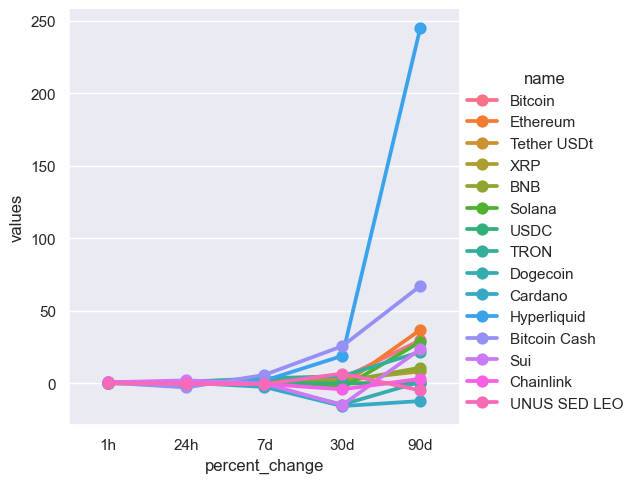

In [58]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [59]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Hyperliquid'")
df10

,name,quote.USD.price,timestamp
10,Hyperliquid,38.81312,2025-07-02 07:26:52.588952


In [41]:
sns.set_theme(style="darkgrid")

sns.lineplot(x=df10['timestamp'], y=df10['quote.USD.price'])

KeyError: '90d'